In [230]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [231]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [232]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [233]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [234]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
Scaled_Data =StandardScaler().fit_transform(df_market_data)

In [235]:


# Create a DataFrame with the scaled data
df_Scaled = pd.DataFrame(Scaled_Data, columns=df_market_data.columns)

# Copy the crypto names from the original DataFrame index (if coin IDs are stored in the index)
df_Scaled['coin_id'] = df_market_data.index

# Set the 'CoinID' column as the index
df_Scaled = df_Scaled.set_index('coin_id')

# Display the first few rows of the scaled DataFrame

df_Scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [236]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [237]:
# Create an empty list to store the inertia values

inertia_values = []

# Create a for loop to compute the inertia for each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=1)
    
    # 2. Fit the model to the scaled data
    kmeans_model.fit(df_Scaled)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)


In [238]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,                # List of k-values (1 to 11)
    'inertia': inertia_values     # Corresponding inertia values
}

# Display the dictionary
print(elbow_data)


# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow


{'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'inertia': [287.0, 212.1233420748626, 165.1367523344681, 79.02243535120975, 66.41305075939437, 61.634088110682214, 46.074467441030215, 43.39269411734827, 32.913222659715245, 30.469111293270355, 26.48010137439893]}


,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


In [239]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
# Plotting the Elbow curve using hvplot


ElbowPlot = df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow",
    xticks=k
)

ElbowPlot

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The Best Fit for 'k' is 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [240]:
# Initialize the K-Means model using the best value for k


# Based on the Elbow curve, assume the best k-value is 4
best_k = 4

# Initialize the KMeans model using the best value for k
kmeans = KMeans(n_clusters=best_k, random_state=1)



In [241]:
# Fit the K-Means model using the scaled DataFrame
# Fit the model to the scaled data
kmeans.fit(df_Scaled)

KMeans(n_clusters=4, random_state=1)

In [242]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predicted_clusters = kmeans.predict(df_Scaled)



# Print the resulting array of cluster values.
predicted_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [243]:
# Create a copy of the scaled DataFrame
df_Scaled_Copy = df_Scaled.copy()

In [244]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_Scaled_Copy['Cluster'] = predicted_clusters

# Display the copy of the scaled DataFrame
df_Scaled_Copy.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [245]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
# Create a scatter plot using hvPlot
scatter_plot = df_Scaled_Copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',  # Color the points by the K-Means cluster labels
    cmap='Category10',  # Color map for different clusters
    hover_cols=['CoinID'],  # Add the crypto name in hover information
    title='Cryptocurrency Clusters Based on Price Change',
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)',
    width=800,
    height=600
)

# Display the scatter plot
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [246]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [247]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca.fit(df_Scaled)

# Transform the data using the PCA model
pca_data = pca.transform(df_Scaled)

# View the scaled PCA data
pca_data

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527],
       [-0.51653377,  1.38837748,  0.80407131],
       [-0.45071134,  0.51769912,  2.84614316],
       [-0.34559977,  0.72943939,  1.47801284],
       [-0.64946792,  0.43216514,  0.60030286],
       [-0.75901394, -0.20119979, -0.21765292],
       [-0.24819846, -1.37625159, -1.46202571],
       [-0.43840762, -0.17533654, -0.6633884 ],
       [-0.69342533, -0.47381462, -0.52759693],
       [ 0.06049915,  2.90940385,  1.49857131],
       [-0.39335243, -0.10819197, -0.01275608],
       [-0.79617564, -0.49440875,  1.08281169],
       [ 0.06407452, -1.26982514, -1.09882928],
       [-0.48901506, -0.73271912, -0.06254323],
       [-0.3062723 ,  0.70341515,  1.71422359],
       [-0.51352775, -0.14280239, -0.65656583],
       [-0.36212044, -0.98691441, -0.728

In [248]:
pca_data.shape

(41, 3)

In [249]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
# Retrieve the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Display the explained variance for each principal component
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance:.4f} variance explained")
    
# Optionally, display the total variance explained by the first 3 components
total_explained_variance = explained_variance.sum()
print(f"\nTotal Variance Explained by 3 components: {total_explained_variance:.4f}")


Principal Component 1: 0.3720 variance explained
Principal Component 2: 0.3470 variance explained
Principal Component 3: 0.1760 variance explained

Total Variance Explained by 3 components: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is 89.50 %

In [250]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(
    pca_data,  # This is the transformed PCA data
    columns=['PC1', 'PC2', 'PC3']  # Naming the principal components
)

# Add back the CoinID index or column if necessary (assuming it's in the original DataFrame)
df_pca['CoinID'] = df_Scaled.index

# Set 'CoinID' as the index
df_pca = df_pca.set_index('CoinID')

# Display the first few rows of the new PCA DataFrame
df_pca.head()


,PC1,PC2,PC3
CoinID,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [251]:
# Create a list with the number of k-values from 1 to 11

k_values = list(range(1, 12))

# Display the list of k-values
k_values


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [252]:
# Create an empty list to store the inertia values

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia for each value of k
for k in range(1, 12):
    # 1. Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the PCA-transformed data (df_market_data_pca)
    kmeans.fit(df_pca)
    
    # 3. Append the model's inertia to the inertia list
    inertia.append(kmeans.inertia_)

# Display the inertia list to check the values
inertia


[256.8740855678924,
 182.33953007775642,
 140.43183298408366,
 49.66549665179734,
 42.05190109791724,
 31.74900524438901,
 28.031869172552746,
 19.451747206041347,
 13.8140819715581,
 10.630647573870968,
 10.12024262995776]

In [253]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data_pca = {
    'k': list(range(1, 12)),  # List of k-values from 1 to 11
    'inertia': inertia  # List of inertia values computed in the previous step
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
df_elbow_pca.head()


,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901


In [254]:
# Plot a line chart with the inertia values to visualize the Elbow curve


# Display the Elbow plot

ElbowPlot_pca = df_elbow_pca.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve PCA",
    xticks=k
)

ElbowPlot_pca

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data? 

  * **Answer:** No, but it has lower inertia. Same clusters but the cluseters are more compact and better seperated in the PCA data

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [255]:
# Initialize the K-Means model using the best value for k
# Set the optimal number of clusters (k)
optimal_k = 4  # Replace with your determined optimal value

# Initialize the K-Means model using the best value for k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)

# Display the initialized K-Means model
kmeans_optimal


KMeans(n_clusters=4, random_state=42)

In [256]:
# Fit the K-Means model using the PCA data
kmeans_optimal.fit(df_pca)

KMeans(n_clusters=4, random_state=42)

In [257]:

# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
predicted_clusters_pca = kmeans_optimal.predict(df_pca)

# Display the predicted clusters for the first few cryptocurrencies
print("Predicted clusters for the first few cryptocurrencies:\n", predicted_clusters)


Predicted clusters for the first few cryptocurrencies:
 [2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [258]:
# Create a copy of the scaled PCA DataFrame

# Create a copy of the scaled PCA DataFrame
df_pca_copy = df_pca.copy()


# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_copy['Cluster'] = predicted_clusters_pca


# Display the copy of the scaled PCA DataFrame
df_pca_copy.head()

,PC1,PC2,PC3,Cluster
CoinID,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [259]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

# Create a scatter plot using hvPlot
scatter_plot = df_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',  # Color by the predicted clusters
    cmap='viridis',  # Choose a color map
    title='Cryptocurrency Clusters in PCA Space',
    hover_cols=['CryptoName'],  # Show the cryptocurrency name on hover
    width=800,
    height=400,
    size=10  # Adjust point size as necessary
)

# Display the scatter plot
scatter_plot


:Scatter   [PC1]   (PC2,Cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

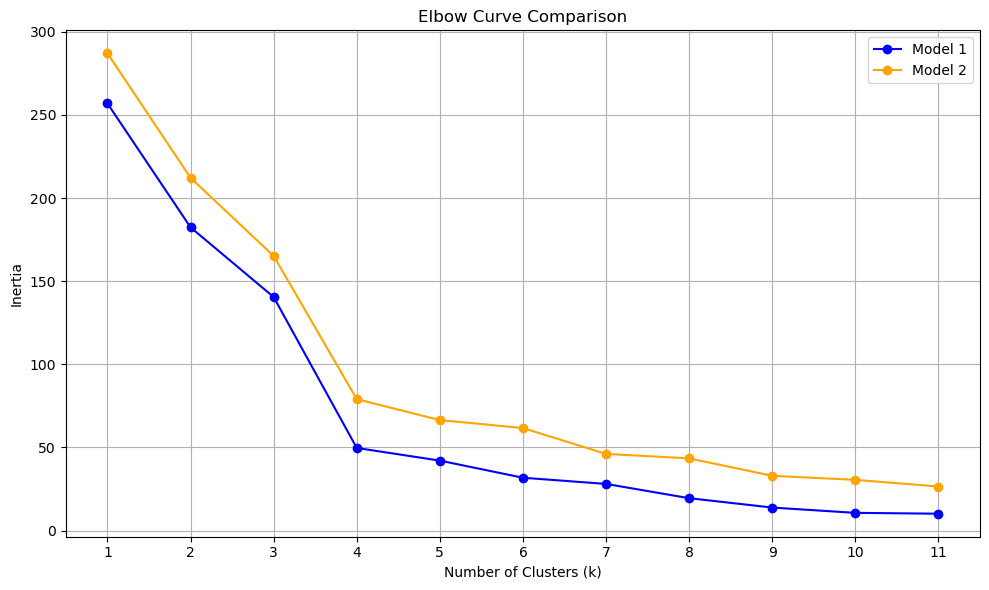

In [260]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt


# Sample data for illustration (replace with actual inertia data)
inertia1 = inertia  # From your previous K-Means model
inertia2 = inertia_values

# Create a composite plot to contrast the Elbow curves
plt.figure(figsize=(10, 6))

# Plot the first inertia curve
plt.plot(range(1, 12), inertia1, marker='o', label='Model 1', color='blue')

# Plot the second inertia curve
plt.plot(range(1, 12), inertia2, marker='o', label='Model 2', color='orange')

# Add titles and labels
plt.title('Elbow Curve Comparison')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 12))  # Set x-ticks to match k-values
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


In [261]:
# Composite plot to contrast the clusters
# Assuming you have different predicted clusters for different K-Means models
# For instance:
# predicted_clusters_1 = kmeans_optimal_1.predict(df_pca)
# predicted_clusters_2 = kmeans_optimal_2.predict(df_pca)

# Add predicted clusters for two models to the PCA DataFrame copy
df_pca_copy['Cluster_Model_1'] = predicted_clusters # Clusters from first model
df_pca_copy['Cluster_Model_2'] = predicted_clusters_pca  # Clusters from second model

# Create scatter plots to visualize the clusters for Model 1
scatter_plot_model_1 = df_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster_Model_1',  # Color points by the first model's clusters
    cmap='viridis',
    title='Clusters from Model 1',
    hover_cols=['CryptoName'],
    width=400,
    height=400,
    size=10
)

# Create scatter plots to visualize the clusters for Model 2
scatter_plot_model_2 = df_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster_Model_2',  # Color points by the second model's clusters
    cmap='plasma',
    title='Clusters from Model 2',
    hover_cols=['CryptoName'],
    width=400,
    height=400,
    size=10
)

# Combine both scatter plots into a composite layout
composite_plot = scatter_plot_model_1 + scatter_plot_model_2

# Display the composite plot
composite_plot


:Layout
   .Scatter.I  :Scatter   [PC1]   (PC2,Cluster_Model_1)
   .Scatter.II :Scatter   [PC1]   (PC2,Cluster_Model_2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**  Using fewer features to cluster the data using K-Means can lead to a reduction in the granularity and specificity of the clusters. This means that:

Cryptocurrencies that might have been separated into distinct clusters with more features could be grouped together when fewer features are used.

The reduced feature set might not capture the full complexity of the data, resulting in less differentiated clusters.

In some cases, important relationships between variables could be lost, leading to overly generalized clusters.